Celem projektu jest analiza osobowości klienta, która pozwala lepiej zrozumieć klienta oraz modyfikować dane produkty w
oparciu o jego docelowych klientów z różnych typów grup. Dlatego też pobiorę odpowiedni zbiór danych, przygotuję go
odpowiednio, aby móc wykorzystać technike grupowania Kmeans, a następnie przeanalizuję grupy klientów.


In [1]:
#Wczytanie bibliotek
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
plt.rcParams['figure.figsize']=18,10
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\komej\Downloads\marketing_campaign.csv',sep='\t')

In [3]:
df.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


In [1]:
'''People
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise
Products
MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion
NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place
NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month'''

"People\nID: Customer's unique identifier\nYear_Birth: Customer's birth year\nEducation: Customer's education level\nMarital_Status: Customer's marital status\nIncome: Customer's yearly household income\nKidhome: Number of children in customer's household\nTeenhome: Number of teenagers in customer's household\nDt_Customer: Date of customer's enrollment with the company\nRecency: Number of days since customer's last purchase\nComplain: 1 if the customer complained in the last 2 years, 0 otherwise\nProducts\nMntWines: Amount spent on wine in last 2 years\nMntFruits: Amount spent on fruits in last 2 years\nMntMeatProducts: Amount spent on meat in last 2 years\nMntFishProducts: Amount spent on fish in last 2 years\nMntSweetProducts: Amount spent on sweets in last 2 years\nMntGoldProds: Amount spent on gold in last 2 years\nPromotion\nNumDealsPurchases: Number of purchases made with a discount\nAcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise\nAcceptedCmp2: 1 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
#Wypełnianie wartości brakiujących miedianą 
df['Income'].fillna(df['Income'].median(),inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [10]:
#Inżynieria danych

#Dodanie kolumny z wiekiem
df['Age']=2022-df['Year_Birth']

#Dodanie kolumny wszystkich wydanych pieniędzy przez kilentów
df['Money_spent']=(df['MntWines']+ df['MntFruits']+ df['MntMeatProducts']+ df['MntFishProducts']+
                   df['MntSweetProducts']+df['MntGoldProds'])
#Dodanie kolumny wszystkich zakupów zrobionych przez klientów
df['NumPurchases']=df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

#Dodanie kolumny z ilością dzieci klientów 
df['Children']=df['Kidhome']+df['Teenhome']

#Uproszczenie danych 
df['Marital_Status']=df['Marital_Status'].replace({'Married':'Together','Divorced':'Single','Widow':'Single',
                                                   'Alone':'Single','Absurd':'Single','YOLO':'Single'})

df["Education"] = df["Education"].replace({"Graduation": "Grad", "PhD": "PostGrad", "Master": "PostGrad",
                                               "2n Cycle": "UnderGrad", "Basic": "UnderGrad"})

In [11]:
#Usunięcie niepotrzebnych danych
df.drop(['ID','Dt_Customer','Z_CostContact','Z_Revenue','Year_Birth'],axis=1,inplace=True)

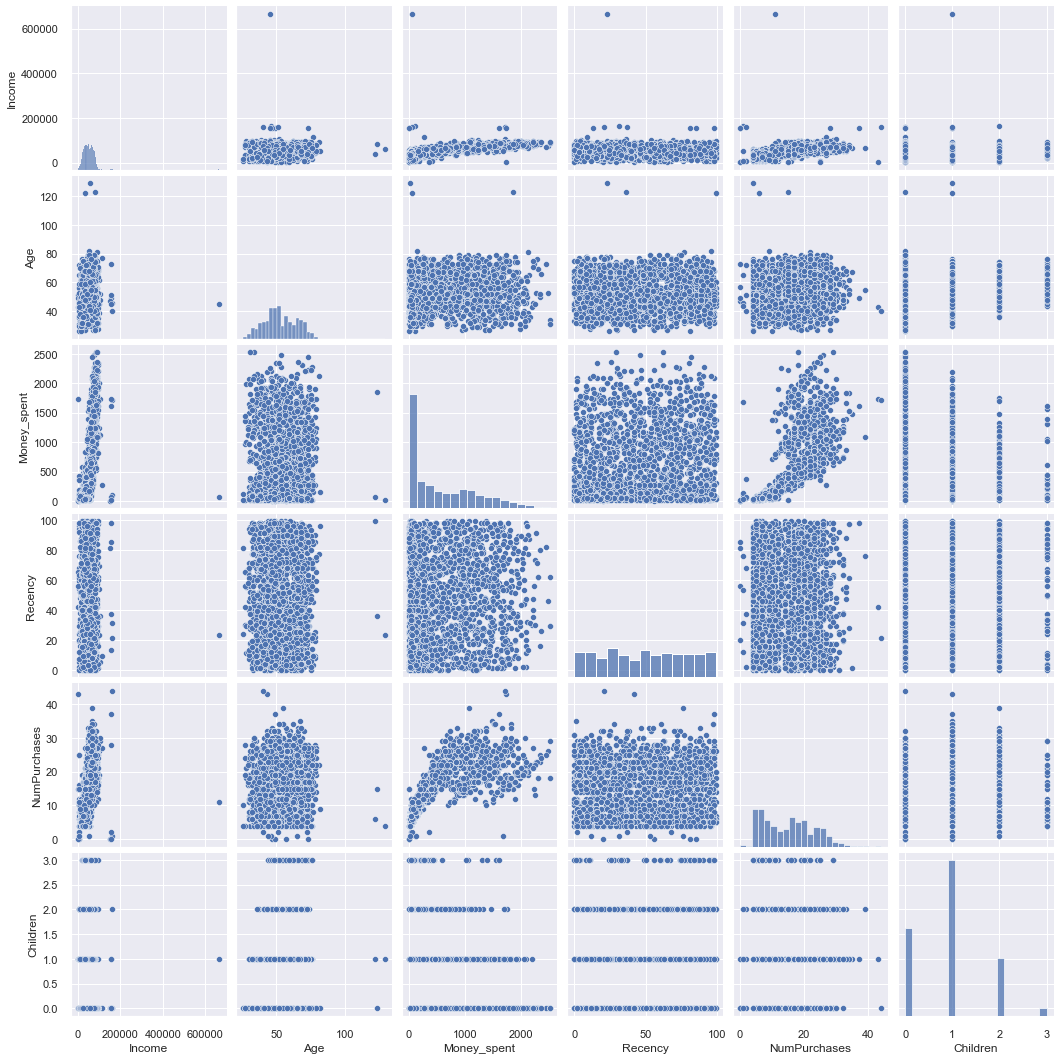

In [12]:
cols_to_plot=["Income", "Age", "Money_spent", "Recency", "NumPurchases", "Children"]
sns.set_theme()
sns.pairplot(df[cols_to_plot],palette='virdis')

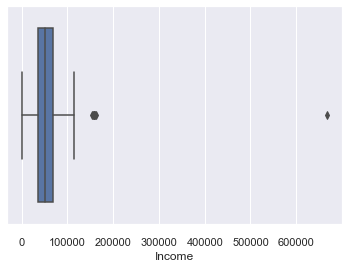

In [13]:
sns.boxplot(x=df['Income'])

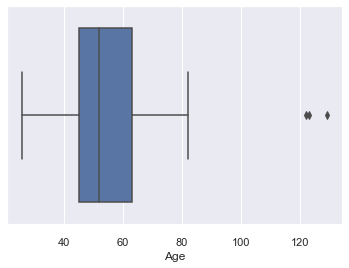

In [14]:
sns.boxplot(x=df['Age'])

In [15]:
#Funkcja pozwalająca usunąć wartości odstające obliczają rozstęp ćwiartkowy(Q3-Q1)
def delete_outliers(df,field):
    iqr=1.5*(np.percentile(df[field],75))-np.percentile(df[field],25)
    df.drop(df[df[field]>(iqr+np.percentile(df[field],75))].index,inplace=True)
    df.drop(df[df[field]<(np.percentile(df[field],25)-iqr)].index,inplace=True),

In [16]:
delete_outliers(df,'Income')
delete_outliers(df,'Age')

C:\anaconda3\envs\keras\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


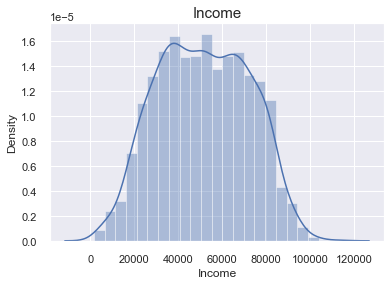

C:\anaconda3\envs\keras\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


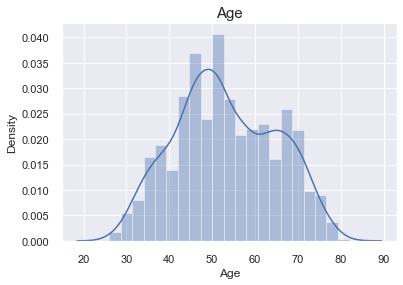

C:\anaconda3\envs\keras\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


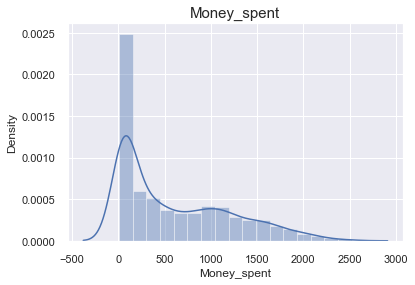

C:\anaconda3\envs\keras\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


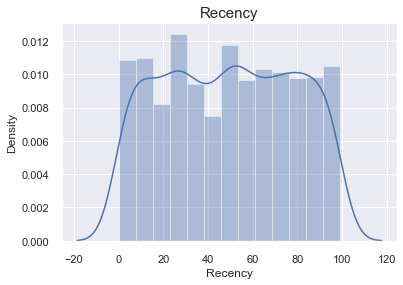

C:\anaconda3\envs\keras\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


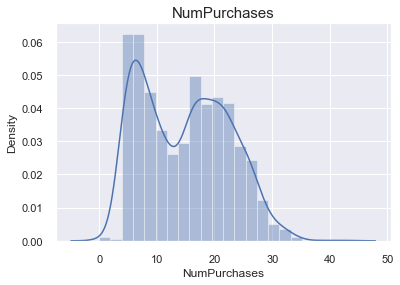

C:\anaconda3\envs\keras\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


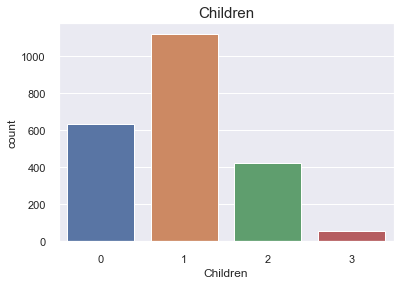

In [17]:
#Wykresy rozkładów danych 
cols_to_plot.remove('Children')

for col in cols_to_plot:
    sns.distplot(df[col])
    plt.title(col,size=15)
    plt.show()

sns.countplot(df['Children'])
plt.title('Children',size=15)
plt.show()

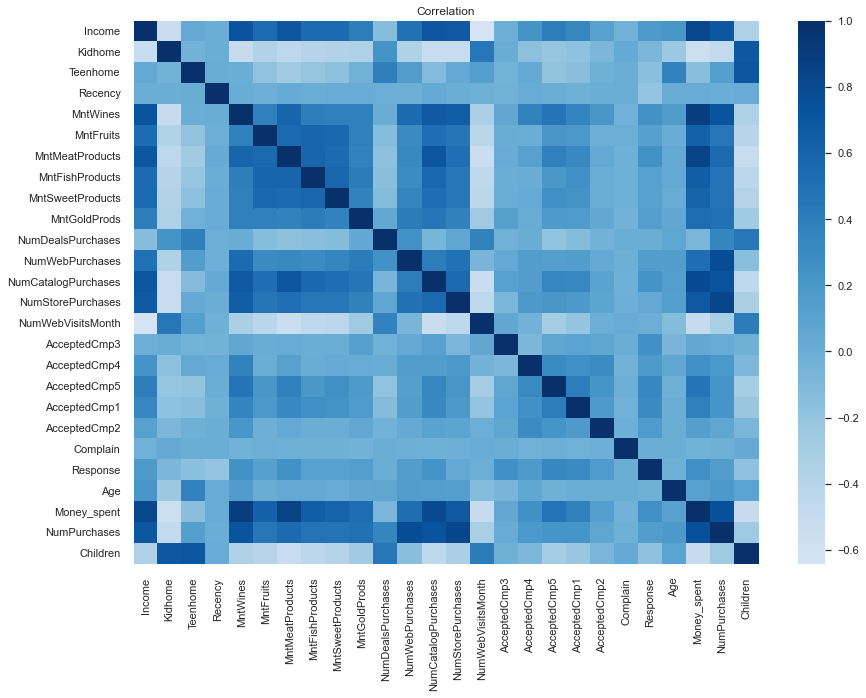

In [18]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),cmap='Blues',center=0)
plt.title('Correlation')
plt.show()

Jak widać na wykresie korelacji danych, jest wiele zależnych od siebie cech, więc wymiary zbioru danych mogą być skutecznie zredukowane.

In [19]:
#Znalezienie kategorycznych danych i zakodowanie
x=df
cat_cols=x.select_dtypes(['object']).columns
x=pd.get_dummies(x,columns=cat_cols)
print(list(cat_cols))

['Education', 'Marital_Status']


In [20]:
num_cols = ["Income", "Recency", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts",
            "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
            "NumStorePurchases","NumWebVisitsMonth", "Money_spent", "NumPurchases", "Age"]
#Normalizacja pozostałych danych
scaler=StandardScaler()
x[num_cols]=scaler.fit_transform(x[num_cols])

Redukcja wymiarowości jaką wykorzystam to analiza głównych składowych(PCA), która pomoże zminimalizować utrate informacji i zwiększy możliwość lepszej interpretacji danych.

In [21]:
pca_var=PCA(n_components=0.95)
pca_var.fit(x)
reduced=pca_var.transform(x)
df_pca=pd.DataFrame(reduced)

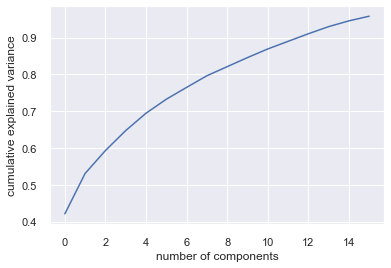

In [22]:
plt.plot(np.cumsum(pca_var.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Z wykresu skumulowanej wartości wariancji można odczyta, że 15 czynników wyjaśnia 95% całkowitej wariancji. Dla tego przykładu wybiorę 3 czynniki, które będą wyjaśniać ok. 60% całkowitej wariancji, co jest dobrą wartością dla badań z zakresu nauk społecznych.

In [23]:
pca=PCA(n_components=3)
pca.fit(x)

x_pca=pd.DataFrame(pca.transform(x),columns=['col1','col2','col3'])

In [24]:
total_var=pca.explained_variance_ratio_.sum()*100
print(total_var)

59.282361480937496


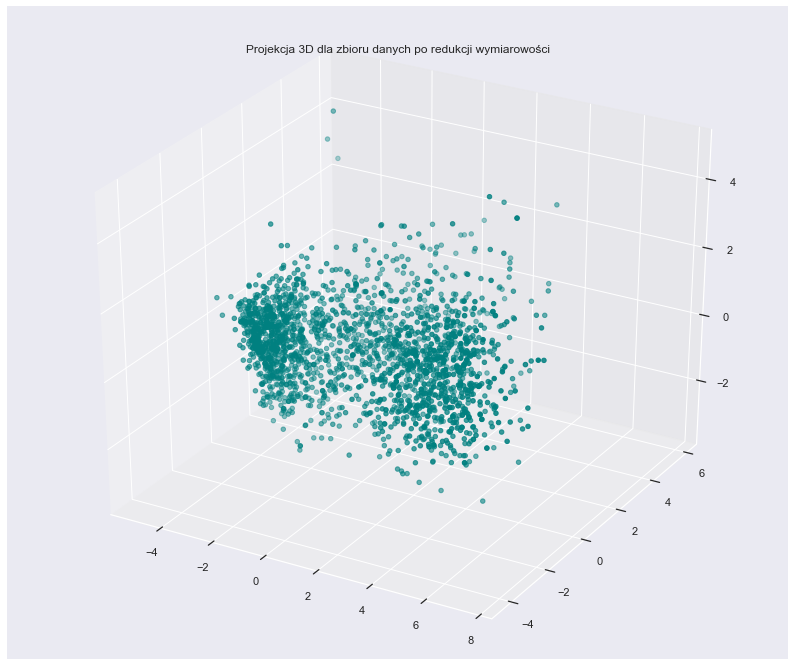

In [25]:
fig=plt.figure(figsize=(14,12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x_pca['col1'],x_pca['col2'],x_pca['col3'],c='teal')
ax.set_title('Projekcja 3D dla zbioru danych po redukcji wymiarowości')
plt.show()

Nie znamy prawdziwego rozkładu zmiennych docelowych, więc zadanie to grupowanie nienadzorowane, model będzie musiał znaleźć relacje w danych. Główny problem polega na tym, że nie znamy optymalnej ilości skupień. Aby to określić zostanie użyta metoda łokcia(k-średnich).

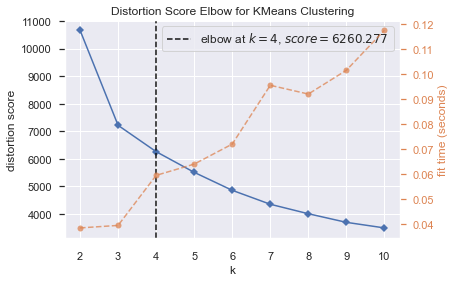

In [26]:
elb_graph=KElbowVisualizer(KMeans(),k=10)
elb_graph.fit(x_pca)
elb_graph.show()

Wykres pokazuje, że 4 klastry są optymalną opcją. Do uzyskania końcowego wyniku grupowania użyję metody KMeans.

In [27]:
kmeans=KMeans(n_clusters=4,init='k-means++',n_init=10,max_iter=100,random_state=42)
predictions=kmeans.fit_predict(x_pca)

In [28]:
df['Clusters']=predictions

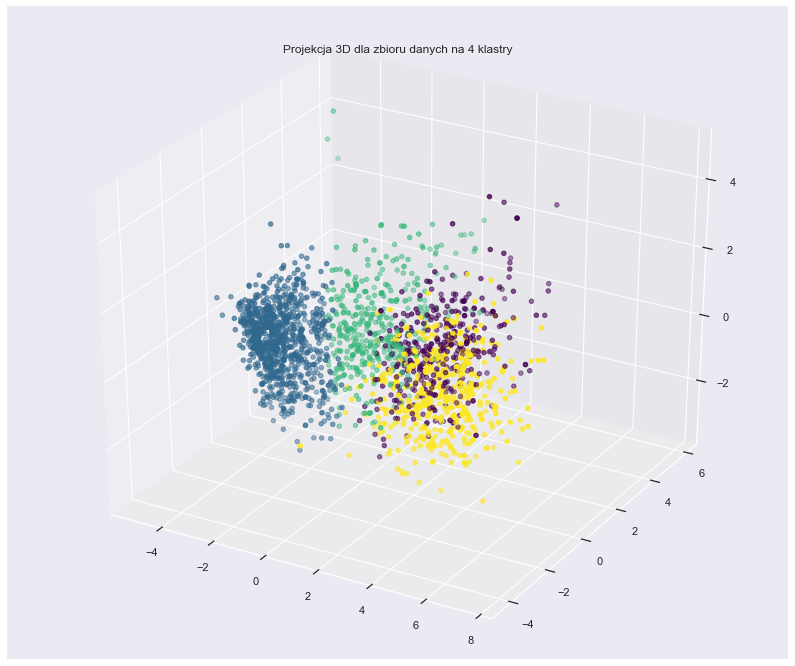

In [29]:
fig=plt.figure(figsize=(14,12))
ax=fig.add_subplot(111,projection='3d',label='bla')
ax.scatter(x_pca['col1'],x_pca['col2'],x_pca['col3'],c=df['Clusters'],marker='o',cmap='viridis')
ax.set_title('Projekcja 3D dla zbioru danych na 4 klastry')
plt.show()

Text(0.5, 1.0, 'Liczebność poszczególnych klastrów')

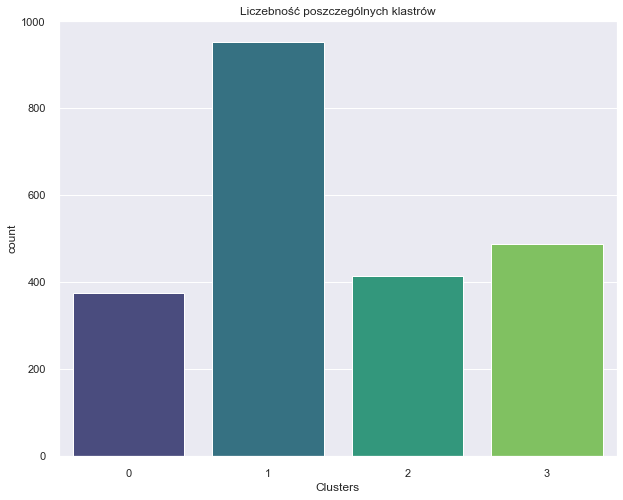

In [30]:
plt.figure(figsize=(10,8))
count_plot=sns.countplot(x=df['Clusters'],palette='viridis')
count_plot.set_title('Liczebność poszczególnych klastrów')

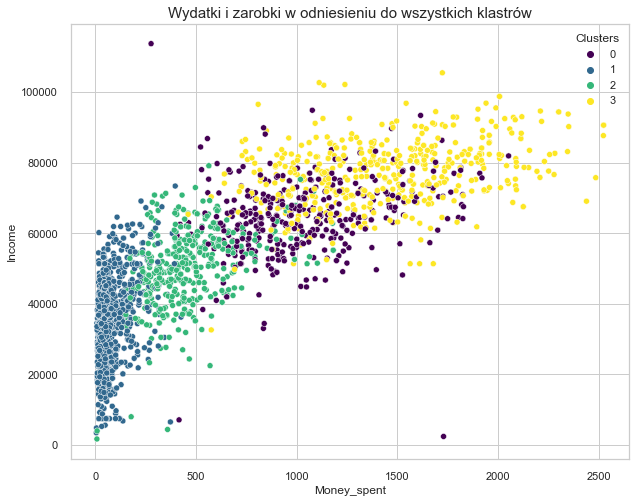

In [31]:
plt.figure(figsize=(10,8))
sns.set_theme(style='whitegrid')
sns.scatterplot(x=df['Money_spent'],y=df['Income'],hue=df['Clusters'],palette='viridis')
plt.title('Wydatki i zarobki w odniesieniu do wszystkich klastrów',size=15)
plt.show()

Klaster 0: Duże wydatki średnie zarobki
Klaster 1: Małe wydatki małe zarobki
Klaster 2: Małe wydatki średnie zarobki
Klaster 3: Duże wydatkie duże zarobki

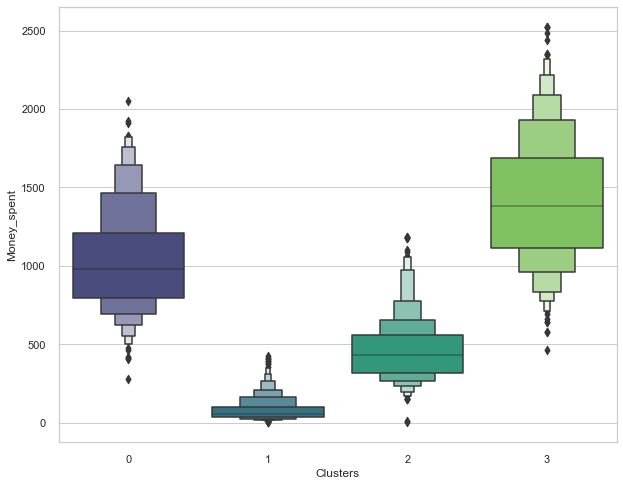

In [32]:
plt.figure(figsize=(10,8))
sns.boxenplot(x=df['Clusters'],y=df['Money_spent'],palette='viridis')
plt.show()

Text(0.5, 1.0, 'Rozkład zakceptowanych promocji')

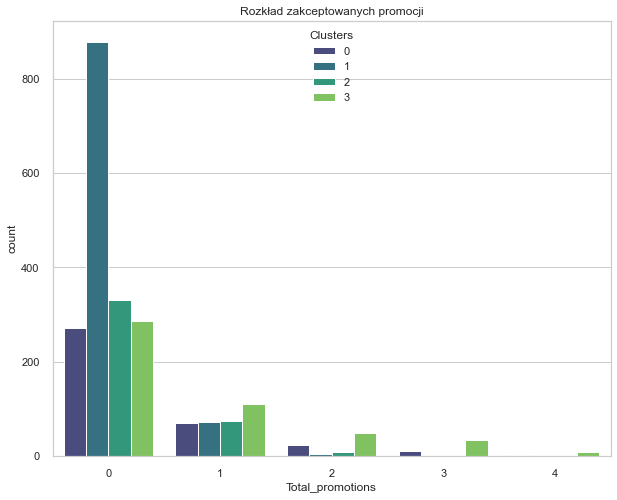

In [33]:
plt.figure(figsize=(10,8))
df['Total_promotions']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']
count_prom=sns.countplot(x=df['Total_promotions'],hue=df['Clusters'],palette='viridis')
count_prom.set_title('Rozkład zakceptowanych promocji')

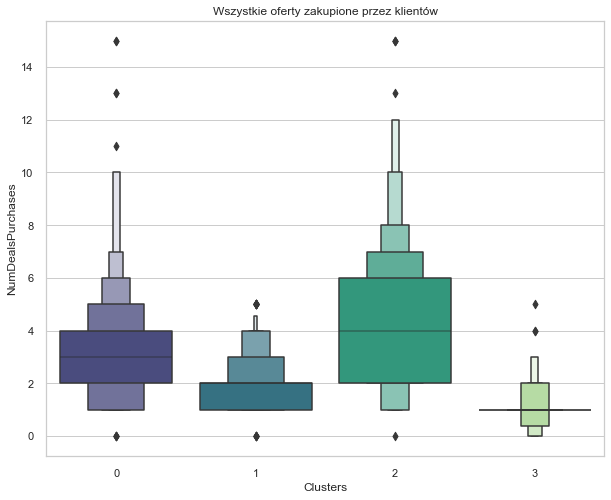

In [34]:
plt.figure(figsize=(10,8))
sns.boxenplot(x=df['Clusters'],y=df['NumDealsPurchases'],palette='viridis')
plt.title('Wszystkie oferty zakupione przez klientów')
plt.show()

W przeciwieństwie do kampanii marketingowej, oferty cieszą się większym zainteresowaniem. Wyraźnie widać klaster 2 daje najlepszy wynik, klaster 0 też dobrze sobie radzi. Klaster 1 i 3 nie są zainteresowane ofertami.

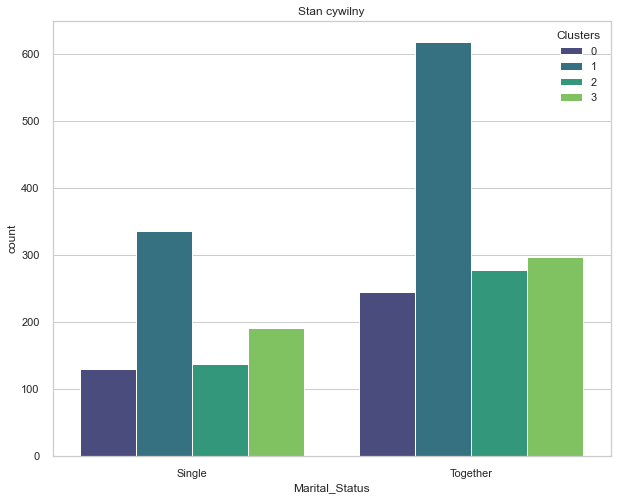

In [43]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['Marital_Status'],hue=df['Clusters'],palette='viridis')
plt.title('Stan cywilny')
plt.show()

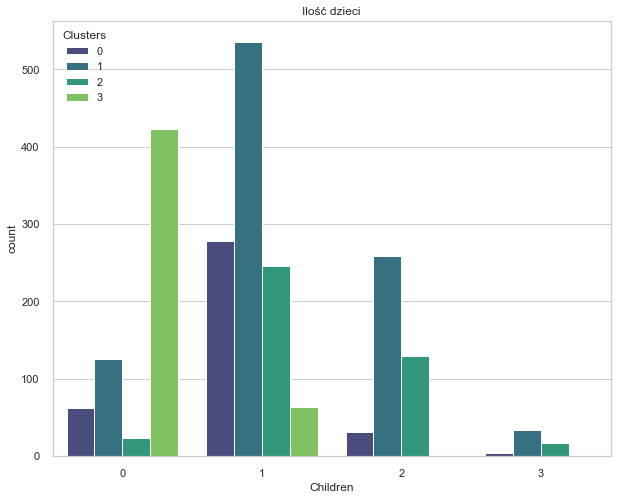

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['Children'],hue=df['Clusters'],palette='viridis')
plt.title('Ilość dzieci')
plt.show()

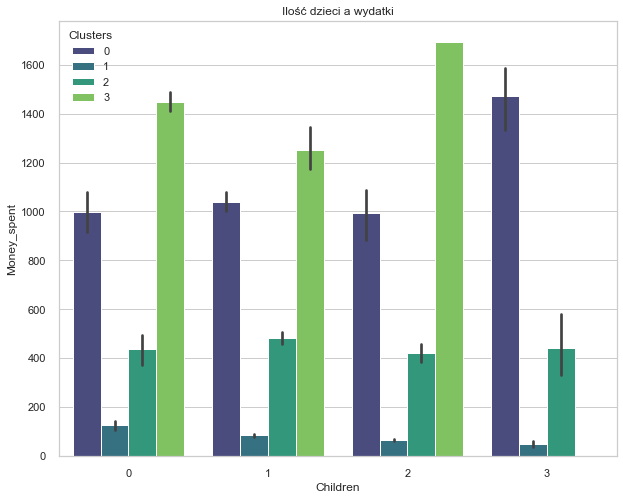

In [36]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['Children'],y=df['Money_spent'],hue=df['Clusters'],palette='viridis')
plt.title('Ilość dzieci a wydatki')
plt.show()

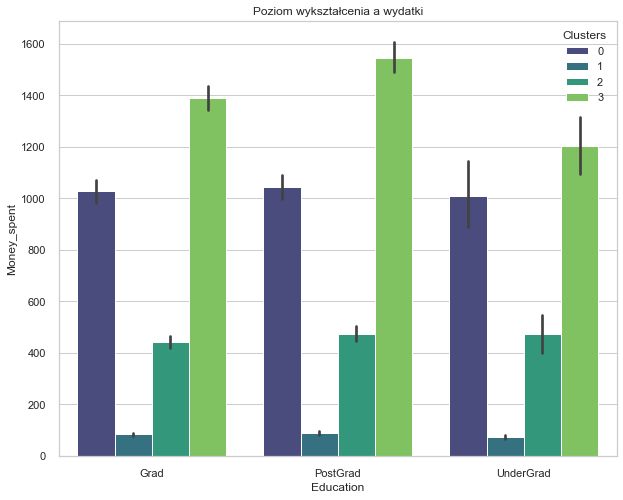

In [37]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['Education'],y=df['Money_spent'],hue=df['Clusters'],palette='viridis')
plt.title('Poziom wykształcenia a wydatki')
plt.show()

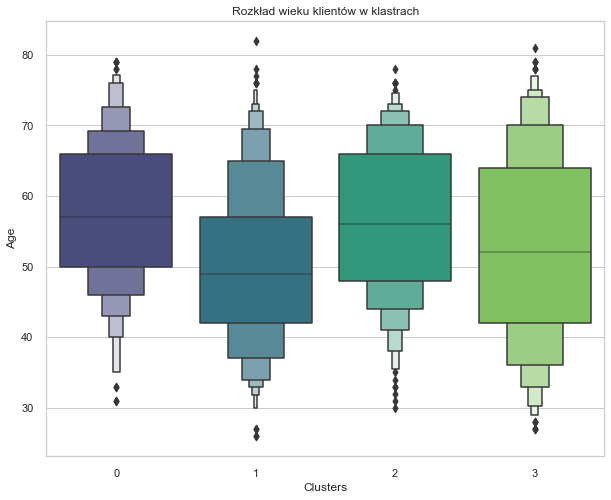

In [38]:
plt.figure(figsize=(10,8))
sns.boxenplot(x=df['Clusters'],y=df['Age'],palette='viridis')
plt.title('Rozkład wieku klientów w klastrach')
plt.show()

Klaster 0: Klienci są stosunkow starsi, zwykle w średnim wieku. Większość z nich ma wykształcenie podypolomowe lub magisterskie(proporcje są równe).
Klaster 1: Klienci są stosunkowo młodsi niż pozostali, a poziom wykształcenia jest prawie rozłożony równomiernie.
Klaster 2: Podobnie jak w klastrze 0, klienci są starsi i mają wykształcenie podyplomowe i magisterskie.
Klaster 3: Zawiera dużo szerszą grupe klientów, klienci we wszystkich możliwych grupach wiekowych i edukacyjnych.

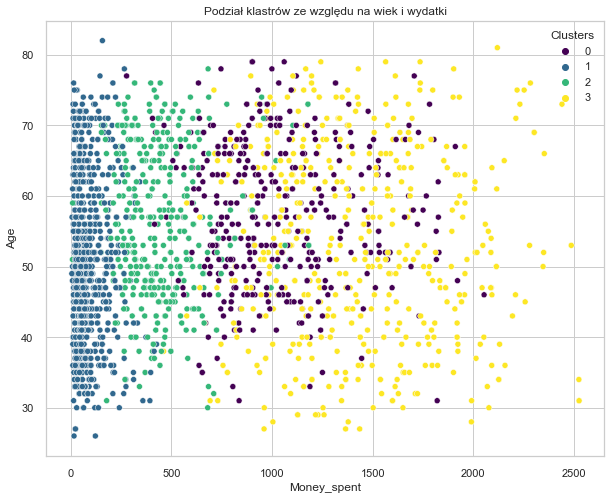

In [39]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['Money_spent'],y=df['Age'],hue=df['Clusters'],palette='viridis')
plt.title('Podział klastrów ze względu na wiek i wydatki')
plt.show()

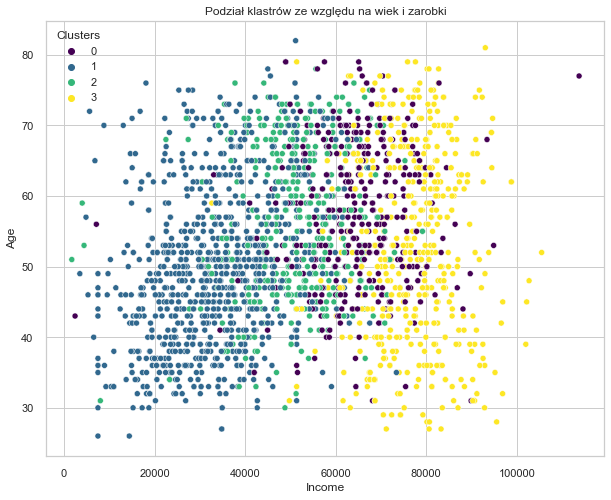

In [40]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['Income'],y=df['Age'],hue=df['Clusters'],palette='viridis')
plt.title('Podział klastrów ze względu na wiek i zarobki')
plt.show()

Grupa 0: podobnie jak w grupie 3, średnie zarobki oraz średnie wydatki, nie powiązane z wiekiem
Grupa 1 i Grupa 2: są ze sobą powiązane, gdyż z wiekiem następuję przejście z grupy 1 (małe zarobki, małe wydatki i niski wiek) do grupy 2(większe zarobki,większe wydatki i większy wiek.)
Grupa 3: charakteryzuje się dużymi zarobkami i wydatkami, ale nie jest powiązane to z wiekiem.

# Podsumowanie

In [ ]:
Klaster 0:
-Głównie posiada jedno dziecko
-Istnieje podzbiór rodzica z dzieckiem
-Stosunkowo starsi(w średnim wieku)
-Wykształcenie podyplomowe lub magisterskie(równe proporcje)
-Duże wydatki i średnie zarobki
-Największa liczba zaakceptowanych promocji
Klaster 1:
-W większości przypadków, posiada partnera
-Posiada jedno dziecko
-Stosunkowo młodsi od pozostałych
-Wykształcenie równomiernie rozłożone
-Małe wydatki i małe zarobki
-Mała liczba zaakceptowanych promocji
Klaster 2:
-Większość nie jest singlem(proporcje prawie równe)
-Posiada od 1 do 3 dzieci
-Prawie wszyscy maja dzieci
-Stosunkowo starsi
-Wykształcenie podyplomowe lub magisterskie
-Małe wydatki i średnie zarobki 
-Duża liczba zaakecptowanych promocji
Klaster 3:
-Większa część posiada partnera(ale proprocje są prawie równe)
-Nie posiada żadnych dzieci 
-Obejmuje wszystkie grupy wiekowe
-Wykształcenie obejmuje wszystkie grupy edukacji
-Duże wydatki i duże zarobki
-Najmniejsza liczba zaakceptowanych promocji